# Artificial Intelligence
## UEMH3073 / UECS2053 / UECS2153

# Lab 2: Genetic Algorithm

This notebook is an assignment requiring you to investigate the Travelling Salesman Problem. Guidance is provided so you can understand what needs to be done for this assignment as you follow through this lab. Convenience classes and functions/ methods are provided.

You will encounter #TODO in the code cells explaining tasks you need to complete. In other words, you will need to write codes and accomplish the #TODO tasks so that the genetic algorithm functions well and runs correctly. Look for "Replacement starts here" and "Replacement ends here" to know the parts of the codes requiring your inputs.
    

The #TODO tasks and their marks distribution are as follows:

a. #TODO1 (10 marks) in the Population Initialization function. You will read a set of cities from the filename when creating an initial population.

b. #TODO2 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Tournament Selection.

c. #TODO3 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Proportional Selection.

d. #TODO4 (10 marks) in the Survival Selection function. You will replace the dummy survival selection function with Merge, Sort & Truncate.
    
e. #TODO5 (10 marks) in the Crossover function. You will replace the dummy crossover function the Partially Mapped Crossover approach.

f. #TODO6 (10 marks) in the Mutation function. You will replace the dummy mutation function with Insertion Mutation approach.

g. #TODO7 (10 marks) in Performance Evaluation. You will present performance evaluation for the different Parent Selection functions.

Marks are also given for: Report Presentation and Formatting (15%) and Code Quality and Comments (15%). More details about this notebook and assignemnt are provided in your lab sheet.

## An Overview of the Travelling Salesman Problem

In the travelling salesman problem, a salesperson wish to find the shortest path that passes through all cities s/he wishes to visit given the coordinates of a set of cities. The salesperson should visit each of the cities once only, and so:

a. Each path consists all cities in the set.

b. Each path visits each of the cities once only. So, none of the cities are visited more than once.

## Imports

In [ ]:
%matplotlib inline

# Please add more imports if you need them

import random
import time
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint as print

## Convenience Classes

### City

The City class, which represents a city, possesses the properties of the city and has functions/ methods used for calculating the distance between the city and another city. Each path, represented by a chromosome, is formed by a set of cities.   

In [ ]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

### Fitness

The Fitness class, which represents the fitness function, possesses the properties of a path and has functions/methods used for calculating the fitness value of the path, which is based on the distance of the path.

In [ ]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = None
        self.fitness = None

    def routeDistance(self):
        if self.distance == None:
            pathDistance = 0.0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i+1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance

    def routeFitness(self):
        if self.fitness == None:
        # Fitness function (Simple division) that uses a simple
        # division that divides one by the distance of the path
            self.fitness = 1 / float(self.routeDistance())
            # Note: You must ensure a division by zero does not occur
        return self.fitness


## Population Initialization  

The population initialization function (or method) performs random initialization. This creates an initial population with completely random chromosomes (or solutions). There are three functions related to population initialization.

The first function is genCityList() which generates a set of cities from a file.  

In [ ]:
def genCityList(filename):
   cityList = []

    # TODO 1 (10 marks) - Replace the following codes that generate 10 random cities.
    # Your new implementation must read a set of cities from the filename to be used for creating
    # an initial population.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors with slight effects on the fitness value.
    # >0 to <5 marks: Major errors with significant effects on the fitness value.
    # 0 marks:        No answer is given.

    # Replacement starts here
   city_list = []
   with open(filename, 'r') as file:
      # Skip header
      next(file)
      # Read each line and split the data
      for line in file:
         city_id, x, y = line.strip().split(', ')
         city_list.append((int(city_id), int(x), int(y)))
   # Generate 10 random cities from the list
   cities = random.sample(range(len(city_list)), 500)
   for index in cities:
        # Create a City object and append it to cityList
        cityList.append(City(x=city_list[index][1], y=city_list[index][2]))
    # Replacement ends here
   return cityList


The second function is createRoute() which generates a random route (chromosome) from a set of City instances.

In [ ]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

The third function is initialPopulation() which calls the second function repeatedly to create an initial population (a list of routes).

In [ ]:
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

Sample run 1 initializes 10 cities in cityList as follows:

cityList = genCityList('cities10.txt')
print(cityList)

Sample run 2 initializes 10 cities in cityList and creates a population with three routes as follows:

cityList = genCityList('cities10.txt')
population = initialPopulation(3, cityList)
print(population)

## Selection

Parents selection selects chromosomes with high fitness values from a population. Survivor selection selects chromosomes with higher fitness values to form the population of the next generation. The population size is len(population), so we have len(population) in this population.

### Parent Selection

There are three implementations for parent selection. The first parentSelection() performs random selection.

In [ ]:
def parentSelection(population, poolSize=None):
    if poolSize == None:
        poolSize = len(population)

    matingPool = []

    for i in range(0, poolSize):
        fitness = Fitness(population[i]).routeFitness()
        matingPool.append(random.choice(population))

    return matingPool

The second parentSelection() performs Tournament Selection.

In [ ]:
def parentSelectionTournament(population, poolSize=None):

    # TODO 2 (10 marks) - Replace the dummy parent selection function below with
    # Tournament Selection.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    # You will need to compare the performance achieved by Random Selection,
    # Tournament Selection, and Proportional Selection during performance evaluation
    # later. So, you will run either Random Selection, Tournament Selection, or
    # Proportional Selection in a simulation run.

    if poolSize == None:
        poolSize = len(population)

    matingPool = []

    # Replacement starts here
    for i in range(0, poolSize):
        # Select individuals randomly for the tournament
        tournament = random.sample(population, 3)

        # Select the best individual from the tournament
        best_individual = min(tournament, key=lambda ind: Fitness(ind).routeDistance())

        matingPool.append(best_individual)
    # Replacement ends here

    return matingPool
    # keqi edited code

The third parentSelection() performs Proportional Selection.

In [ ]:
def parentSelectionProportional(population, poolSize=None):

    # TODO 3 (10 marks) - Replace the dummy parent selection function below with
    # Proportional Selection.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    # You will need to compare the performance achieved by Random Selection,
    # Tournament Selection, and Proportional Selection during performance evaluation
    # later. So, you will run either Random Selection, Tournament Selection, or
    # Proportional Selection in a simulation run.

    if poolSize == None:
        poolSize = len(population)

    matingPool = []

    # Replacement starts here
    # Calculate S= the sum of fitness
    S = sum(1.0 / Fitness(ind).routeDistance() for ind in population)

    for i in range(0, poolSize):
        pick = random.uniform(0, S)
        current = 0

        # Select individuals based on the proportion of their fitness
        for ind in population:
            current += 1.0 / Fitness(ind).routeDistance()
            if current > pick:
                matingPool.append(ind)
                break

    return matingPool

  # keqi edited code

### Survival Selection

In [ ]:
def survivorSelection(population, eliteSize):

    # TODO 4 (10 marks) - Replace the dummy survival selection function below with
    # Merge, Sort & Truncate.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    elites = []

    # Replacement starts here

    # modify here

    # Combine parents and offspring
    merge_population = population + population
    # Sort the merged population by fitness
    merge_population.sort(key=lambda x: Fitness(x).routeFitness(), reverse=True)
    # Truncate the merged population to the elite size
    elites = merge_population[:eliteSize]
    # Replacement ends here

    return elites

    # modify by eric

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

Sample run 1 initializes 10 cities in cityList, creates a population with four routes, and creates a pool of parents as follows:

In [ ]:
#Sample run 1 initializes 10 cities in cityList, creates a population with four routes, and creates a pool of parents as follows:
cityList = genCityList("cities500.txt")
population = initialPopulation(4, cityList)
matingPool = parentSelection(population, 2)
print(matingPool)

#modify by eric

[[(59,0),
  (30,20),
  (31,73),
  (69,80),
  (48,35),
  (94,95),
  (10,89),
  (66,10),
  (2,24),
  (7,90),
  (66,100),
  (61,15),
  (85,18),
  (59,86),
  (86,45),
  (87,13),
  (70,19),
  (15,70),
  (82,88),
  (12,92),
  (98,61),
  (59,3),
  (24,38),
  (22,73),
  (69,43),
  (87,78),
  (76,63),
  (62,33),
  (20,91),
  (14,38),
  (51,88),
  (7,46),
  (45,86),
  (39,40),
  (40,60),
  (61,99),
  (83,44),
  (12,18),
  (27,86),
  (12,56),
  (45,81),
  (73,15),
  (37,33),
  (8,25),
  (89,85),
  (92,75),
  (89,31),
  (66,25),
  (27,75),
  (77,29),
  (22,71),
  (39,59),
  (30,22),
  (31,58),
  (29,58),
  (12,98),
  (7,36),
  (27,0),
  (91,32),
  (93,27),
  (10,69),
  (76,79),
  (14,12),
  (50,48),
  (6,40),
  (59,19),
  (53,88),
  (50,78),
  (15,20),
  (9,55),
  (14,74),
  (48,32),
  (37,59),
  (56,5),
  (65,36),
  (15,46),
  (28,27),
  (56,5),
  (77,16),
  (59,58),
  (20,0),
  (4,44),
  (64,48),
  (55,5),
  (4,24),
  (52,28),
  (93,30),
  (77,30),
  (3,27),
  (92,19),
  (13,86),
  (25,75),
  (5

Sample run 2 initializes 10 cities in cityList, creates a population with four routes, select an elite chromosome as follows:

In [ ]:
#Sample run 2 initializes 10 cities in cityList, creates a population with four routes, select an elite chromosome as follows:
cityList = genCityList("cities500.txt")
population = initialPopulation(4, cityList)
elite = survivorSelection(population, 1)
print(elite)

#modify by eric

[[(32,19),
  (68,40),
  (91,27),
  (2,98),
  (58,2),
  (60,70),
  (93,49),
  (44,6),
  (51,67),
  (64,15),
  (7,90),
  (25,43),
  (9,55),
  (19,52),
  (82,18),
  (59,58),
  (43,4),
  (71,27),
  (66,13),
  (83,44),
  (68,28),
  (77,30),
  (56,55),
  (11,98),
  (69,2),
  (59,84),
  (71,97),
  (69,80),
  (35,91),
  (39,49),
  (22,73),
  (94,40),
  (89,72),
  (23,92),
  (40,10),
  (61,63),
  (80,68),
  (10,4),
  (52,65),
  (81,28),
  (100,30),
  (10,31),
  (48,61),
  (7,88),
  (55,15),
  (75,0),
  (37,56),
  (74,54),
  (61,21),
  (28,27),
  (75,67),
  (26,30),
  (76,54),
  (98,26),
  (87,78),
  (70,41),
  (71,15),
  (58,59),
  (13,87),
  (77,23),
  (17,72),
  (92,36),
  (56,77),
  (92,57),
  (90,2),
  (32,82),
  (7,2),
  (62,62),
  (85,100),
  (44,66),
  (84,85),
  (53,88),
  (3,33),
  (87,13),
  (51,86),
  (37,24),
  (81,94),
  (44,100),
  (52,28),
  (37,33),
  (10,67),
  (29,58),
  (48,32),
  (74,71),
  (4,3),
  (16,12),
  (56,5),
  (23,23),
  (0,49),
  (33,34),
  (67,91),
  (42,42),
  (

population = initialPopulation(4, genCityList('cities10.txt'))
elites = survivorSelection(population, 1)
print('Initial population')
print(population)
print('Selected elites')
print(elites)


## Crossover


Crossover selects two parents, crossover the genetic materials of the parents, and produce one or more children. In the Travelling Salesman Problem, each travelling path must be valid. Each path consists all cities in the set, and each path visits each of the cities once only. So, none of the cities are visited more than once. Exchanging parts of two chromosomes tend to produce invalid paths. As an example, Parent 1 is [2 1 0 7 3 5 4 6] and Parent 2 is [6 1 0 5 2 3 4 7]. One point crossover at midpoint generates Child 1 [2 1 0 7 2 3 4 7] and Child 2 [6 1 0 5 3 5 4 6]. Both children are invalid paths.     

In [ ]:
def crossover(parent1, parent2):

    # TODO 5 (10 marks) - Replace the dummy crossover function below with
    # Partially Mapped Crossover approach.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    # Replacement starts here
    size = len(parent1)

    # Choose two crossover points randomly
    cx_point1 = random.randint(0, size - 1)
    cx_point2 = random.randint(0, size - 1)

    if cx_point1 > cx_point2:
        cx_point1, cx_point2 = cx_point2, cx_point1

    # Initialize the children with None
    child1 = [None] * size
    child2 = [None] * size

    # Copy the segment between cx_point1 and cx_point2 from parents to children
    child1[cx_point1:cx_point2] = parent1[cx_point1:cx_point2]
    child2[cx_point1:cx_point2] = parent2[cx_point1:cx_point2]

    def pmx_fill(child, parent, cx_point1, cx_point2):
        # Fill in the remaining positions using PMX
        for i in range(cx_point1, cx_point2):
            if parent[i] not in child:
                pos = i
                while cx_point1 <= pos < cx_point2:
                    pos = parent.index(child[pos])
                child[pos] = parent[i]

        for i in range(size):
            if child[i] is None:
                child[i] = parent[i]

    # Fill in the remaining positions
    pmx_fill(child1, parent2, cx_point1, cx_point2)
    pmx_fill(child2, parent1, cx_point1, cx_point2)

    return child1, child2

Crossover selects two parents from the mating pool to produce a new generation of the same size.

In [ ]:
def breedPopulation(matingpool):
    children = []

    # Choosing parents in their order of presence in the mating pool. Choosing parents
    # in a random manner is possible.

    for i in range(1, len(matingpool), 2):
        child1, child2 = crossover(matingpool[i-1], matingpool[i])
        children.append(child1)
        children.append(child2)

    return children

In [ ]:
population = initialPopulation(2, genCityList('cities500.txt'))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

'Parents'
[(89,31),
 (28,98),
 (72,66),
 (89,52),
 (62,62),
 (30,22),
 (51,97),
 (87,78),
 (73,15),
 (3,9),
 (69,2),
 (57,5),
 (85,53),
 (1,77),
 (3,34),
 (85,33),
 (7,94),
 (54,74),
 (70,16),
 (62,13),
 (85,18),
 (15,46),
 (57,57),
 (37,30),
 (0,90),
 (26,90),
 (41,97),
 (64,48),
 (91,27),
 (100,64),
 (27,81),
 (82,31),
 (9,55),
 (40,10),
 (51,47),
 (2,98),
 (39,4),
 (17,57),
 (98,49),
 (92,36),
 (78,60),
 (25,75),
 (39,27),
 (81,94),
 (78,28),
 (70,93),
 (53,88),
 (55,15),
 (63,59),
 (4,57),
 (51,67),
 (73,53),
 (15,34),
 (96,59),
 (69,44),
 (77,16),
 (73,68),
 (37,17),
 (87,13),
 (28,19),
 (9,37),
 (25,4),
 (32,19),
 (22,71),
 (42,87),
 (10,67),
 (29,58),
 (61,99),
 (35,5),
 (25,80),
 (67,4),
 (35,46),
 (59,84),
 (12,56),
 (0,29),
 (70,41),
 (36,1),
 (11,16),
 (75,54),
 (41,57),
 (53,43),
 (57,70),
 (45,72),
 (31,58),
 (5,48),
 (56,77),
 (10,4),
 (6,73),
 (17,39),
 (15,51),
 (80,52),
 (16,15),
 (26,17),
 (37,59),
 (12,98),
 (76,63),
 (46,83),
 (4,24),
 (13,54),
 (61,32),
 (63,62),
 

population = initialPopulation(2, genCityList('cities10.txt'))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

In [ ]:
population = initialPopulation(2, genCityList('cities500.txt'))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

'Parents'
[(75,0),
 (52,35),
 (20,0),
 (0,41),
 (90,94),
 (84,85),
 (31,58),
 (4,75),
 (70,70),
 (3,9),
 (13,37),
 (3,62),
 (59,75),
 (43,4),
 (8,1),
 (41,57),
 (76,15),
 (86,45),
 (71,15),
 (34,59),
 (92,13),
 (52,65),
 (88,65),
 (10,89),
 (78,94),
 (100,9),
 (6,73),
 (40,80),
 (65,36),
 (58,88),
 (91,31),
 (22,77),
 (42,59),
 (19,80),
 (81,44),
 (3,27),
 (59,1),
 (56,51),
 (15,34),
 (21,52),
 (56,15),
 (26,39),
 (15,70),
 (80,68),
 (55,33),
 (83,21),
 (63,49),
 (89,69),
 (0,51),
 (64,48),
 (40,60),
 (37,17),
 (32,39),
 (55,15),
 (89,31),
 (35,46),
 (74,49),
 (36,64),
 (14,74),
 (69,43),
 (74,99),
 (52,75),
 (79,75),
 (57,71),
 (70,41),
 (62,52),
 (12,22),
 (56,5),
 (3,66),
 (68,60),
 (5,31),
 (30,20),
 (51,70),
 (91,32),
 (0,90),
 (17,89),
 (15,51),
 (94,40),
 (23,23),
 (70,16),
 (79,91),
 (1,1),
 (33,49),
 (75,93),
 (91,53),
 (85,18),
 (39,27),
 (9,12),
 (76,49),
 (96,59),
 (76,63),
 (4,57),
 (26,17),
 (9,52),
 (59,86),
 (59,54),
 (7,88),
 (94,95),
 (56,80),
 (75,71),
 (97,33),
 (37

## Mutation

Mutation mutates a single chromosome to get a mutated chromosome so that genetic algorithm can converge to a shorter path quickly. In the Travelling Saleman Problem, a mutated chromosome must be a valid path. As an example, the insertion mutation randomly inserts a single gene in the [1 2 3 4 5 6 7 8 9 10] chromosome to generate the [1 2 4 5 6 7 3 8 9 10] mutated chromosome. Step 1: select a gene randomly, Step 2: insert this gene into a randomly selected location.

In [ ]:
def mutate(route, mutationProbability):

    # TODO 6 (10 marks) - Replace the dummy mutation function below with Insertion Mutation.
    # The dummy mutation function simply swaps a city with the city before it.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    mutated_route = route[:]
    for i in range(len(route)):
        if (random.random() < mutationProbability):
            # mutationProbability is the probability of a gene undergoing mutation

            # Replacement starts here
            # Step 1: Select a random gene (city) to remove
            geneIndex = random.randint(0, len(mutated_route) - 1)
            gene = mutated_route.pop(geneIndex)

            # Step 2: Insert the gene into a new random position in the route
            insertIndex = random.randint(0, len(mutated_route))
            mutated_route.insert(insertIndex, gene)
            # Replacement ends here
    return mutated_route

Mutation runs over the entire population and mutates each chromosome in the population with a small mutationProbability.

In [ ]:
def mutation(population, mutationProbability):
    mutatedPopulation = []
    for i in range(0, len(population)):
        mutatedIndividual = mutate(population[i], mutationProbability)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a route comprised of 10 cities in cityList, and then mutates it as follows:

In [ ]:
route = genCityList('cities500.txt')
mutated = mutate(route, 1)  # Give a pretty high chance for mutation
print('Original route')
print(route)
print('Mutated route')
print(mutated)

'Original route'
[(9,91),
 (91,13),
 (51,32),
 (2,47),
 (81,94),
 (98,26),
 (89,69),
 (80,68),
 (52,81),
 (51,67),
 (93,49),
 (15,17),
 (44,66),
 (60,50),
 (58,83),
 (3,27),
 (13,54),
 (64,48),
 (28,19),
 (44,64),
 (20,81),
 (27,0),
 (67,4),
 (82,18),
 (73,14),
 (88,31),
 (65,68),
 (44,4),
 (25,95),
 (20,0),
 (32,39),
 (91,8),
 (76,25),
 (77,16),
 (25,75),
 (56,94),
 (75,93),
 (10,69),
 (36,64),
 (48,62),
 (58,59),
 (80,100),
 (35,55),
 (87,78),
 (10,31),
 (12,18),
 (39,40),
 (30,20),
 (57,71),
 (36,97),
 (60,60),
 (52,28),
 (37,12),
 (55,5),
 (30,22),
 (47,87),
 (51,94),
 (28,27),
 (27,17),
 (35,67),
 (44,29),
 (75,67),
 (59,75),
 (98,92),
 (72,66),
 (68,13),
 (37,33),
 (17,72),
 (57,70),
 (51,97),
 (12,92),
 (22,95),
 (91,32),
 (84,85),
 (41,57),
 (1,56),
 (98,14),
 (23,23),
 (68,1),
 (9,19),
 (72,78),
 (14,74),
 (26,17),
 (51,78),
 (1,1),
 (68,60),
 (12,22),
 (79,91),
 (89,5),
 (10,89),
 (96,87),
 (56,5),
 (44,54),
 (74,99),
 (40,10),
 (82,36),
 (78,60),
 (75,70),
 (41,38),
 (81,44)

route = genCityList('cities10.txt')
mutated = mutate(route, 1)  # Give a pretty high chance for mutation
print('Original route')
print(route)
print('Mutated route')
print(mutated)

## Running One Generation (or Interation)

Here, we run one generation of genetic algorithm.

In [ ]:
def oneGeneration(population, eliteSize, mutationProbability):

    # First we preserve the elites
    elites = survivorSelection(population, eliteSize)

    # Then we calculate what our mating pool size should be and generate
    # the mating pool
    poolSize = len(population) - eliteSize
    matingpool = parentSelection(population, poolSize)

    # Then we perform crossover on the mating pool
    children = breedPopulation(matingpool)

    # We combine the elites and children into one population
    new_population = elites + children

    # We mutate the population
    mutated_population = mutation(new_population, mutationProbability)

    return mutated_population

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a population comprised of 5 chromosomes based on 10 cities in cityList, and then run one generation (or iteration) of genetic algorithm as follows:

population = initialPopulation(5, genCityList('cities10.txt'))
eliteSize = 1
mutationProbability = 0.01
new_population = oneGeneration(population, eliteSize, mutationProbability)
print('Initial population')
print(population)
print('New population')
print(new_population)

## Running Many Generations (or Interations)

'Best distance for initial population: 24984.346975847293'
'Best distance for population in iteration 0: 24848.114696390778'
'Best distance for population in iteration 1: 24809.18114219441'
'Best distance for population in iteration 2: 24686.78770023487'
'Best distance for population in iteration 3: 24680.40072044862'
'Best distance for population in iteration 4: 24497.99158453711'
'Best distance for population in iteration 5: 24507.709082466867'
'Best distance for population in iteration 6: 24527.88533320637'
'Best distance for population in iteration 7: 24490.18660256062'
'Best distance for population in iteration 8: 24149.28120415001'
'Best distance for population in iteration 9: 24317.23457031795'
'Best distance for population in iteration 10: 24321.13074501506'
'Best distance for population in iteration 11: 24301.4885900636'
'Best distance for population in iteration 12: 24279.899131314258'
'Best distance for population in iteration 13: 24208.77941365344'
'Best distance for popula

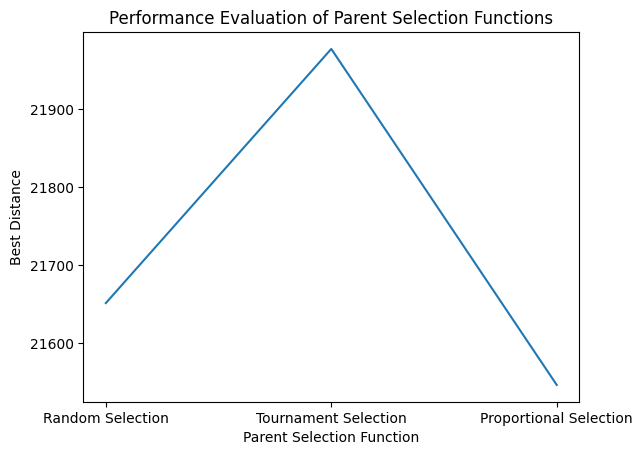

'Evaluating Random Selection...'
'Generation 0: Best distance = 25365.814958095634'
'Generation 1: Best distance = 25351.487684328065'
'Generation 2: Best distance = 25123.40736691428'
'Generation 3: Best distance = 25085.84135978616'
'Generation 4: Best distance = 25098.53232732483'
'Generation 5: Best distance = 25006.133652876593'
'Generation 6: Best distance = 24661.410399283122'
'Generation 7: Best distance = 24737.253670545033'
'Generation 8: Best distance = 24623.111561361555'
'Generation 9: Best distance = 24488.848525674246'
'Generation 10: Best distance = 24479.817170487975'
'Generation 11: Best distance = 24449.863297572774'
'Generation 12: Best distance = 24395.733185735953'
'Generation 13: Best distance = 24357.75035093388'
'Generation 14: Best distance = 24357.21390287482'
'Generation 15: Best distance = 24192.618186669504'
'Generation 16: Best distance = 24128.549659024557'
'Generation 17: Best distance = 24118.954193901263'
'Generation 18: Best distance = 24036.48613143

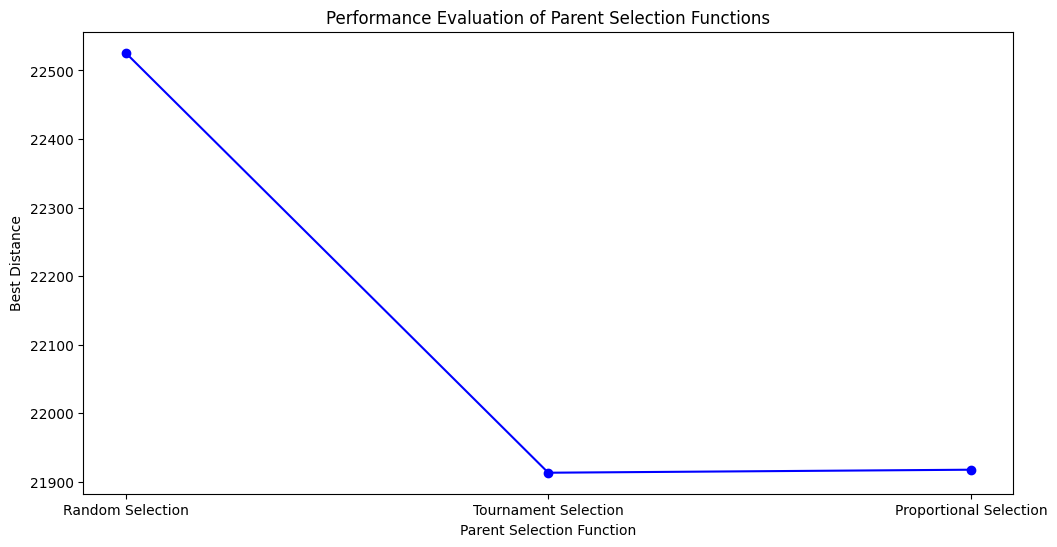

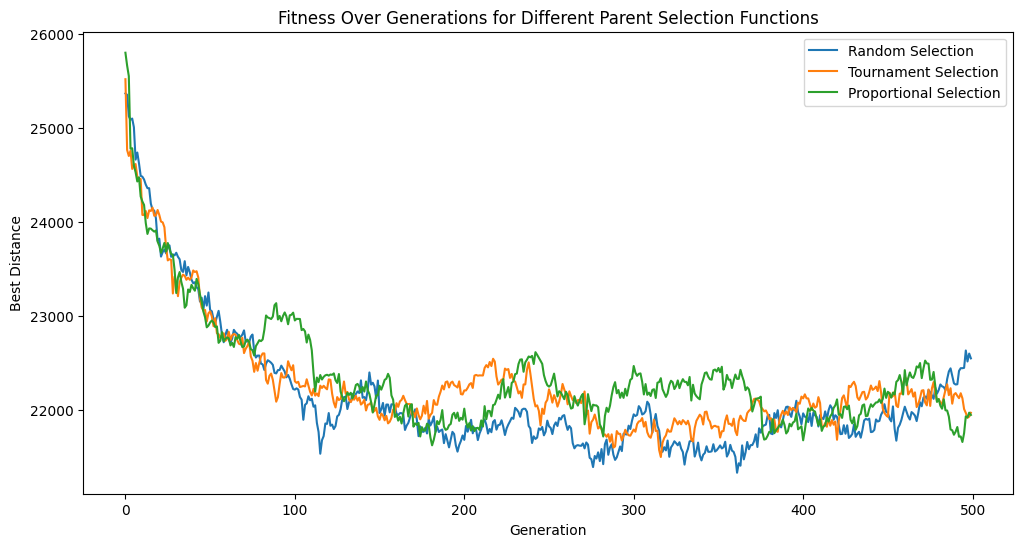

'Best distance for population in iteration 0: 21995.179213832245'
'Best distance for population in iteration 1: 21972.289241148603'
'Best distance for population in iteration 2: 21944.22261661249'
'Best distance for population in iteration 3: 21933.287252638234'
'Best distance for population in iteration 4: 21929.524501807857'
'Best distance for population in iteration 5: 21909.051045770117'
'Best distance for population in iteration 6: 21910.76357351942'
'Best distance for population in iteration 7: 21808.64854281248'
'Best distance for population in iteration 8: 21953.77008336152'
'Best distance for population in iteration 9: 22017.02580525872'
'Best distance for population in iteration 10: 21955.57017216653'
'Best distance for population in iteration 11: 21927.868726192028'
'Best distance for population in iteration 12: 21835.724588816618'
'Best distance for population in iteration 13: 21752.658392567075'
'Best distance for population in iteration 14: 21813.872236606174'
'Best dista

In [ ]:
filename = 'cities500.txt'
popSize = 20
eliteSize = 5
mutationProbability = 0.01
iteration_limit = 500

cityList = genCityList(filename)

population = initialPopulation(popSize, cityList)
distances = [Fitness(p).routeDistance() for p in population]
min_dist = min(distances)
print("Best distance for initial population: " + str(min_dist))

for i in range(iteration_limit):
    population = oneGeneration(population, eliteSize, mutationProbability)
    distances = [Fitness(p).routeDistance() for p in population]
    index = np.argmin(distances)
    best_route = population[index]
    min_dist = min(distances)
    print("Best distance for population in iteration " + str(i) +
          ": " + str(min_dist))

print("Optimal path is " + str(best_route))

    # TODO 7 (10 marks) - Performance Evaluation. You will present the performance achieved
    # by different parent selection function. You will compare the
    # performance achieved by Random Selection, Tournament Selection, and Proportional Selection.

    # Marking scheme:
    # 7 to 10 marks:  In-depth performance evaluation. Optimal routes are found.
    # 5 to <7 marks:  Clear understanding of performance evaluation.
    # >0 to <5 marks: Inaccurate or unclear understanding of performance evaluation.
    # 0 marks:        No answer is given.

# performance evaluation for parentSelection function
parentSelection_functions = [parentSelection, parentSelectionTournament, parentSelectionProportional]
parentSelection_names = ['Random Selection', 'Tournament Selection', 'Proportional Selection']
all_best_distances = []

for i in range(3):
    population = initialPopulation(popSize, cityList)
    distances = [Fitness(p).routeDistance() for p in population]
    min_dist = min(distances)
    print("Best distance for initial population: " + str(min_dist))

    for j in range(iteration_limit):
        population = oneGeneration(population, eliteSize, mutationProbability)
        distances = [Fitness(p).routeDistance() for p in population]
        index = np.argmin(distances)
        best_route = population[index]
        min_dist = min(distances)
        print("Best distance for population in iteration " + str(j) +
              ": " + str(min_dist))

    print("Optimal path is " + str(best_route))
    all_best_distances.append(min_dist)

plt.plot(parentSelection_names, all_best_distances)
plt.xlabel('Parent Selection Function')
plt.ylabel('Best Distance')
plt.title('Performance Evaluation of Parent Selection Functions')
plt.show()

# Measure fitness function values
# Initialize lists to store results
all_best_distances = []
all_fitness_over_generations = {name: [] for name in parentSelection_names}

# Evaluate performance of each parent selection function
for selection_function, name in zip(parentSelection_functions, parentSelection_names):
    print(f"Evaluating {name}...")

    # Initialize population
    cityList = genCityList('cities500.txt')
    population = initialPopulation(popSize, cityList)

    for generation in range(iteration_limit):
        distances = [Fitness(p).routeDistance() for p in population]
        min_dist = min(distances)
        all_fitness_over_generations[name].append(min_dist)
        print(f"Generation {generation}: Best distance = {min_dist}")

        # Evolve the population using the current selection function
        population = oneGeneration(population, eliteSize, mutationProbability)

    # Capture the final best distance
    distances = [Fitness(p).routeDistance() for p in population]
    min_dist = min(distances)
    all_best_distances.append(min_dist)
    print(f"Optimal path for {name}: {min_dist}")

# Plot the best distances
plt.figure(figsize=(12, 6))
plt.plot(parentSelection_names, all_best_distances, marker='o', linestyle='-', color='b')
plt.xlabel('Parent Selection Function')
plt.ylabel('Best Distance')
plt.title('Performance Evaluation of Parent Selection Functions')
plt.show()

# Plot the fitness values over generations for each selection function
plt.figure(figsize=(12, 6))
for name in parentSelection_names:
    plt.plot(all_fitness_over_generations[name], label=name)
plt.xlabel('Generation')
plt.ylabel('Best Distance')
plt.title('Fitness Over Generations for Different Parent Selection Functions')
plt.legend()
plt.show()

# Find the city with the best distance to its next city
best_city = None
best_distance = float('inf')

for i in range(len(best_route)):
    from_city = best_route[i]
    to_city = best_route[(i + 1) % len(best_route)]  # Loop back to the first city
    distance = from_city.distance(to_city)

    if distance < best_distance:
        best_distance = distance
        best_city = from_city
# Variable to keep track of the best route
best_route_overall = None
best_distance_overall = float('inf')

for i in range(iteration_limit):
    population = oneGeneration(population, eliteSize, mutationProbability)
    distances = [Fitness(p).routeDistance() for p in population]
    index = np.argmin(distances)
    best_route = population[index]
    min_dist = min(distances)

    print("Best distance for population in iteration " + str(i) + ": " + str(min_dist))

    # Update the overall best route and distance if the current best is better
    if min_dist < best_distance_overall:
        best_distance_overall = min_dist
        best_route_overall = best_route

city_id_map = {city: city_id for city_id, city in enumerate(cityList)}

# Function to extract city IDs from a route
def extractCityIDs(route):
    return [city_id_map[city] for city in route]

# After finding the best route
best_route_ids = extractCityIDs(best_route_overall)

# Return the best route found after all iterations
print("Optimal path (City IDs) is: " + str(best_route_ids))
print("Best distance: " + str(best_distance_overall))
